In [1]:
# Imports all packages necessary or useful

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Opens our medical_clean data csv file for analysis

df = pd.read_csv(r"C:\Users\caleb\OneDrive\Desktop\WGU\D214 - Graduate Capstone\Data Sets\Performance\bodyPerformance.csv")

In [3]:
# Quickly visualizes our data set in a dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [4]:
# Gives us a snapshot of values contained in each of our variables

pd.set_option("display.max_columns", 0)
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [5]:
# Detects any duplicated observations in our data set

df.duplicated().value_counts()

False    13392
True         1
dtype: int64

In [6]:
# Isolates our single duplicate observation

duplicate = df[df.duplicated()]
duplicate

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
12473,27.0,F,157.0,49.1,30.7,70.0,86.0,27.7,19.7,51.0,167.0,A


In [7]:
# Drops our duplicate row

df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

False    13392
dtype: int64

In [8]:
# Detects any null values in our data set

df.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [9]:
# Assigns variables for our simple linear regression model

x = df['body fat_%']
y = df['gripForce']

In [10]:
# Gives a statistical summary of our predictor variable

x.describe()

count    13392.000000
mean        23.239608
std          7.256829
min          3.000000
25%         18.000000
50%         22.800000
75%         28.000000
max         78.400000
Name: body fat_%, dtype: float64

In [11]:
# Gives a statistical summary of our reponse variable

y.describe()

count    13392.000000
mean        36.964569
std         10.624959
min          0.000000
25%         27.500000
50%         37.900000
75%         45.200000
max         70.500000
Name: gripForce, dtype: float64

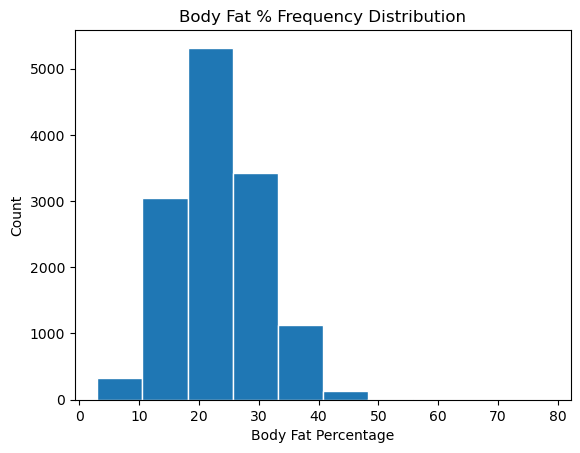

In [12]:
# Creates a histogram of our independent variable

plt.hist(x, edgecolor="white")
plt.xlabel("Body Fat Percentage")
plt.ylabel("Count")
plt.title("Body Fat % Frequency Distribution")
plt.show()

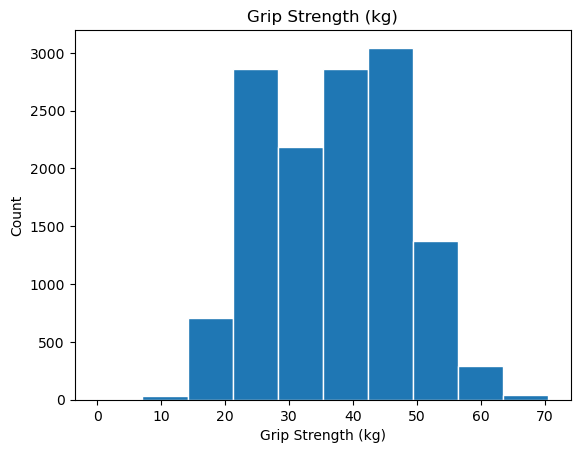

In [13]:
# Creates a histogram of our dependent variable

plt.hist(y, edgecolor="white")
plt.xlabel("Grip Strength (kg)")
plt.ylabel("Count")
plt.title("Grip Strength (kg)")
plt.show()

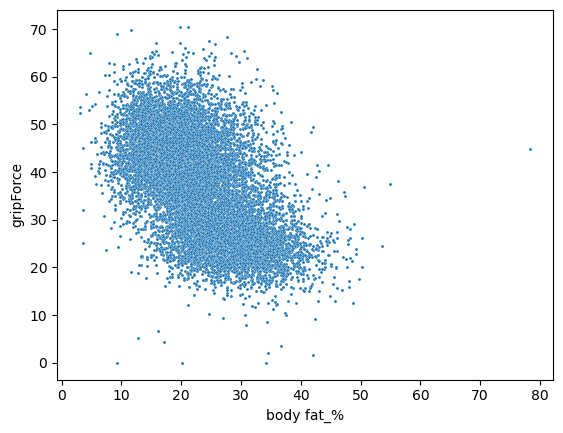

In [14]:
# Visualizes distribution of body fat percentage versus grip strength
# An outlier indicating a person wtih ~80% body fat is extremely unlikely

ax = sns.scatterplot(data = df, x = x, y = y, s = 5)

In [15]:
# Identifies the body fat_% outlier location

df.loc[df['body fat_%'].idxmax()]

age                         21.0
gender                         M
height_cm                  177.6
weight_kg                   74.5
body fat_%                  78.4
diastolic                   69.0
systolic                   122.0
gripForce                   44.9
sit and bend forward_cm     26.1
sit-ups counts              59.0
broad jump_cm              235.0
class                          A
Name: 735, dtype: object

In [16]:
# Selects and drops the outlier observation (appears at index value 735)

df.drop(index = 735, inplace = True)
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [17]:
# Resets variables for our simple linear regression model following outlier removal

x = df['body fat_%']
y = df['gripForce']

In [18]:
# Gives a statistical summary of our predictor variable following outlier removal

x.describe()

count    13391.000000
mean        23.235489
std          7.241426
min          3.000000
25%         18.000000
50%         22.800000
75%         28.000000
max         54.900000
Name: body fat_%, dtype: float64

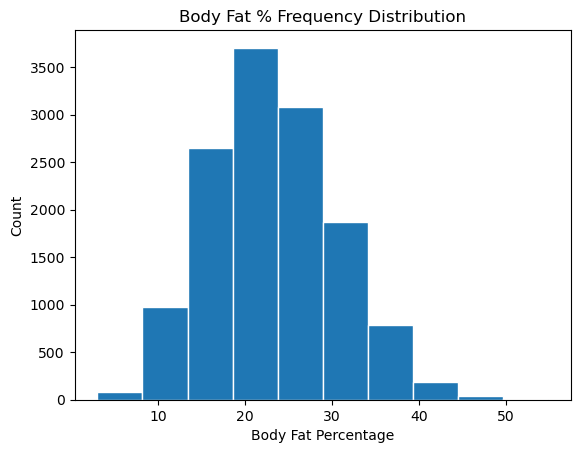

In [19]:
# Creates a histogram of our independent variable following outlier removal

plt.hist(x, edgecolor="white")
plt.xlabel("Body Fat Percentage")
plt.ylabel("Count")
plt.title("Body Fat % Frequency Distribution")
plt.show()

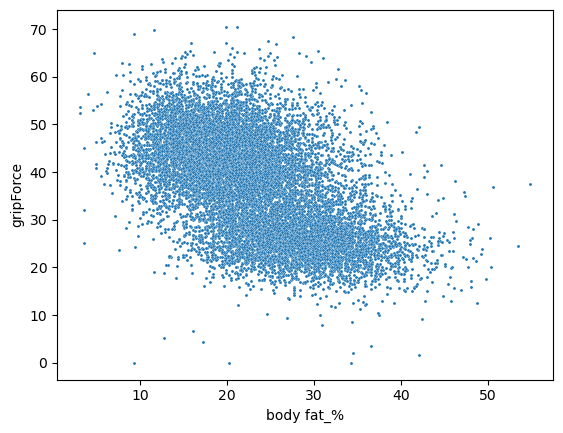

In [20]:
# Visualizes distribution of body fat percentage versus grip strength following outlier removal

ax = sns.scatterplot(data = df, x = x, y = y, s = 5)

In [21]:
# Splits our data into 80% training and 20% testing sets

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 8)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10712,) (2679,) (10712,) (2679,)


In [22]:
# Creates an OLS linear regression model with a y-intercept at 1
# A p-value of 0.000 indicates a significant relationship between body fat percentage and grip force (kg) where body fat percentage is negatively correlated with grip strength
# A low R-squared value indicates the model does a poor job accounting for variance
# R-squared may improve with inclusion of more variables to account for more varaince in the data set

X = sm.add_constant(X_train)
results = sm.OLS(y_train, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              gripForce   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     4414.
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        22:31:15   Log-Likelihood:                -38668.
No. Observations:               10712   AIC:                         7.734e+04
Df Residuals:                   10710   BIC:                         7.736e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.4561      0.291    190.378      0.000      54.885      56.027
body fat_%    -0.7966      0.012    -66.438      0.000      -0.820      -0.773
==============================================================================
Omnibus:                       38.643   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.967
Skew:                           0.147   Prob(JB):                     3.45e-09
Kurtosis:                       3.026   Cond. No.                         82.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Gives a residual squared error score for our model with regard to the dependent variable
# As above, the standard deviation for gripForce (kg) is 10.624959

score = np.sqrt(results.scale)
score

8.943838124431581

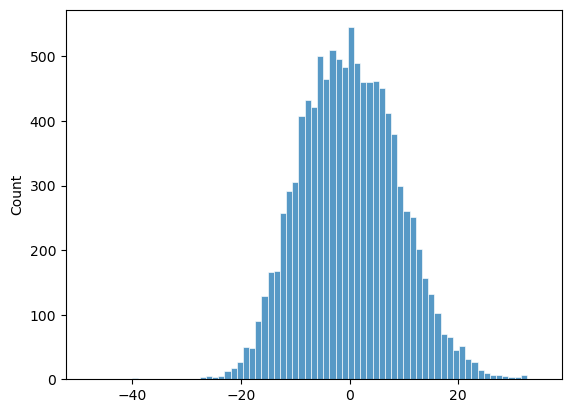

In [24]:
# Plots the model residuals as a histogram; mostly centered around 0 though in a large range

sns.histplot(results.resid, edgecolor = "white")
plt.show()

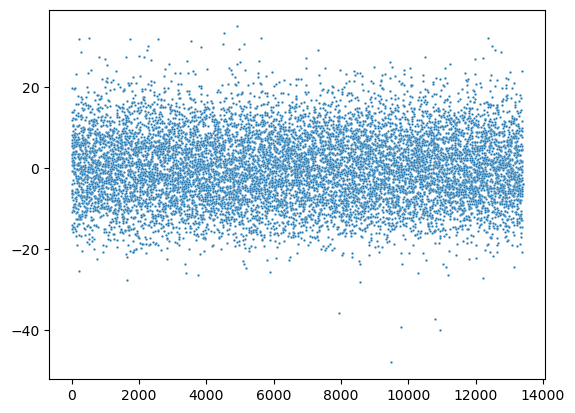

In [25]:
# Plots the model residuals as a scatterplot; mostly centered around 0 though in a large range

sns.scatterplot(results.resid, s = 3)
plt.show()

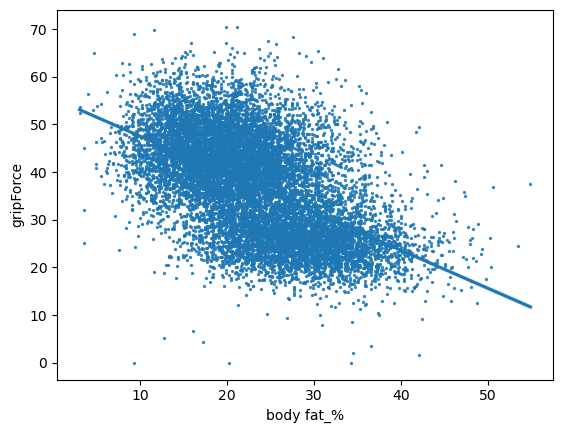

In [26]:
# Plots the regression line

sns.regplot(x = 'body fat_%', y = 'gripForce', data = df, scatter_kws={'s':2})
plt.show()